In [1]:
!pip install ktrain

     |████████████████████████████████| 25.3 MB 96 kB/s 
     |████████████████████████████████| 6.8 MB 31.3 MB/s 
     |████████████████████████████████| 981 kB 36.6 MB/s 
     |████████████████████████████████| 263 kB 43.4 MB/s 
     |████████████████████████████████| 1.9 MB 35.9 MB/s 
     |████████████████████████████████| 1.2 MB 34.9 MB/s 
     |████████████████████████████████| 468 kB 35.0 MB/s 
     |████████████████████████████████| 895 kB 37.7 MB/s 
     |████████████████████████████████| 3.3 MB 45.4 MB/s 
  Created wheel for ktrain: filename=ktrain-0.27.2-py3-none-any.whl size=25283088 sha256=a4470ca1065eceded02211f6a708cf68cbc6545c8ad2001d35ea5556ed646cc0
  Stored in directory: /root/.cache/pip/wheels/88/be/4a/971c83a380a40f12e877f643ca1b94dc65f528f94c88dbcff7
  Created wheel for seqeval: filename=seqeval-0.0.19-py3-none-any.whl size=9929 sha256=aab2e68641ea6f3d15fd7bc6bc2bd3d0b2e008a338312f03f30ba5a05b8178f9
  Stored in directory: /root/.cache/pip/wheels/f5/ac/f1/4e13d7aff0

In [2]:
import ktrain

In [3]:
!git clone https://github.com/laxmimerit/Image-Dataset-for-Age-Prediction.git

Cloning into 'Image-Dataset-for-Age-Prediction'...
remote: Enumerating objects: 47107, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 47107 (delta 0), reused 2 (delta 0), pack-reused 47104
Receiving objects: 100% (47107/47107), 1.37 GiB | 24.82 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (24110/24110), done.


In [4]:
%matplotlib inline
import os
from ktrain import vision as vis
import re

In [5]:
pattern = r'([^/]+)_\d+_\d+_\d+.jpg$'

In [6]:
p = re.compile(pattern)

In [7]:
r = p.search('100_0_0_20170112213500903.jpg')

In [8]:
print(r.group(1))

100


In [9]:
datadir = '/content/Image-Dataset-for-Age-Prediction/images'

In [10]:
(train_data, test_data, preproc) = vis.images_from_fname(datadir,pattern,is_regression=True,random_state=42)

/usr/local/lib/python3.7/dist-packages/ktrain/vision/data.py:736: UserWarning: Could not extract target for /content/Image-Dataset-for-Age-Prediction/images/61_1_20170109142408075.jpg -  skipping this file
  warnings.warn('Could not extract target for %s -  skipping this file'% (fname))
/usr/local/lib/python3.7/dist-packages/ktrain/vision/data.py:736: UserWarning: Could not extract target for /content/Image-Dataset-for-Age-Prediction/images/39_1_20170116174525125.jpg -  skipping this file
  warnings.warn('Could not extract target for %s -  skipping this file'% (fname))
/usr/local/lib/python3.7/dist-packages/ktrain/vision/data.py:736: UserWarning: Could not extract target for /content/Image-Dataset-for-Age-Prediction/images/24_0_1_20170116220224657 .jpg -  skipping this file
  warnings.warn('Could not extract target for %s -  skipping this file'% (fname))
/usr/local/lib/python3.7/dist-packages/ktrain/vision/data.py:736: UserWarning: Could not extract target for /content/Image-Dataset-fo

['label']
       label
12304   40.0
6161    18.0
19807    5.0
21202   75.0
14941   16.0
['label']
       label
16139   75.0
14926   24.0
8979    38.0
12077    4.0
14568   88.0
Found 21690 validated image filenames.
Found 2411 validated image filenames.


In [12]:
vis.print_image_regression_models()

pretrained_resnet50: 50-layer Residual Network (pretrained on ImageNet)
resnet50: 50-layer Resididual Network (randomly initialized)
pretrained_mobilenet: MobileNet Neural Network (pretrained on ImageNet)
mobilenet: MobileNet Neural Network (randomly initialized)
pretrained_inception: Inception Version 3  (pretrained on ImageNet)
inception: Inception Version 3 (randomly initialized)
wrn22: 22-layer Wide Residual Network (randomly initialized)
default_cnn: a default LeNet-like Convolutional Neural Network


In [15]:
model = vis.image_regression_model('pretrained_resnet50',train_data=train_data,val_data=test_data)

The normalization scheme has been changed for use with a pretrained_resnet50 model. If you decide to use a different model, please reload your dataset with a ktrain.vision.data.images_from* function.

Is Multi-Label? False
Is Regression? True
94773248/94765736 [==============================] - 1s 0us/step
pretrained_resnet50 model created.


In [16]:
learner = ktrain.get_learner(model, train_data=train_data, val_data=test_data,batch_size=64)

In [17]:
#learner.lr_find(show_plot=True)
learning_rate = 1e-4

In [18]:
learner.fit_onecycle(lr=learning_rate,epochs=2)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/2
339/339 [==============================] - 454s 1s/step - loss: 359.4127 - mae: 14.1209 - val_loss: 189.9039 - val_mae: 10.4298
Epoch 2/2
339/339 [==============================] - 410s 1s/step - loss: 172.6451 - mae: 10.0576 - val_loss: 167.9240 - val_mae: 9.8274


In [19]:
learner.freeze(15) # freeze first 15 layers of the pre-trained Resnet model and unfrezze remaining 35 layers
learner.fit_onecycle(lr=learning_rate,epochs=2) # train the unfrozen 35 layers



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/2
339/339 [==============================] - 535s 2s/step - loss: 107.9410 - mae: 7.7884 - val_loss: 278.9362 - val_mae: 12.4057
Epoch 2/2
339/339 [==============================] - 507s 1s/step - loss: 45.1610 - mae: 5.0842 - val_loss: 64.5027 - val_mae: 5.7274


In [20]:
predictor = ktrain.get_predictor(learner.model,preproc)

In [21]:
test_data.filenames[10:20]

['4_1_0_20170109192110040.jpg',
 '21_0_4_20170103210434754.jpg',
 '45_0_0_20170117170741266.jpg',
 '4_1_1_20170117202024231.jpg',
 '18_1_0_20170109214725387.jpg',
 '26_0_2_20170116165341590.jpg',
 '19_1_0_20170119145731470.jpg',
 '8_0_0_20170104230750674.jpg',
 '26_0_4_20170108224531895.jpg',
 '55_1_0_20170103183939755.jpg']

In [22]:
def show_prediction(fname):
  fname = datadir + '/' + fname
  pred = round(predictor.predict_filename(fname)[0])
  actual = int(p.search(fname).group(1))
  vis.show_image(fname)
  print("Predicted Age: %s | Actual Age: %s" % (pred,actual))

Predicted Age: 33 | Actual Age: 26


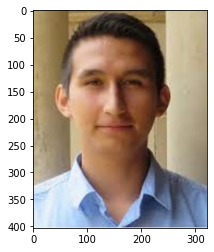

In [25]:
show_prediction('26_0_4_20170108224531895.jpg')

In [23]:
predictor.save('/content/age_prediction')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [24]:
# you cannot download the complete folder, hence you need to zip it to download the full folder together 
!zip -r /content/age_predictor.zip /content/age_prediction    # r means recurrsive zip, i.e zip all the contents

  adding: content/age_prediction/ (stored 0%)
  adding: content/age_prediction/tf_model.h5 (deflated 9%)
  adding: content/age_prediction/tf_model.preproc (deflated 41%)
